# Вариант 6

Цель: Сравнение MaxPool и Global Average Pooling.

Спроектируйте сеть для входа (3, 64, 64) и выхода (32, 8, 8).  
Условие: В сети обязательно должны быть и MaxPool2d, и AdaptiveAvgPool2d.  
Эксперимент: Сравните выходы после MaxPool и GAP на одном и том же случайном тензоре, визуализируйте карты признаков и среднее значение активаций.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
class PoolCompareNet(nn.Module):
    def __init__(self):
        super().__init__()

        # Общая сверточная часть (вход - 3х64х64)
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), # 3x64x64 -> 32x64x64
            nn.ReLU()
        )

        # MaxPool уменьшает пространственное разрешение
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)   # 32x64x64 -> 32x32x32

        # GAP приведёт к нужному размеру
        self.gap = nn.AdaptiveAvgPool2d((8, 8))  # 32x32x32 -> 32x8x8

    def forward(self, x):
        x = self.conv(x)
        x_max = self.maxpool(x) # выход после MaxPool
        x_gap = self.gap(x) # выход после GAP
        return x_max, x_gap

In [4]:
# (вход - 1x3х64х64)
x = torch.randn(1, 3, 64, 64)

model = PoolCompareNet()
model.eval()

with torch.no_grad():
    out_max, out_gap = model(x)

In [9]:
out_max.shape, out_gap.shape

(torch.Size([1, 32, 32, 32]), torch.Size([1, 32, 8, 8]))

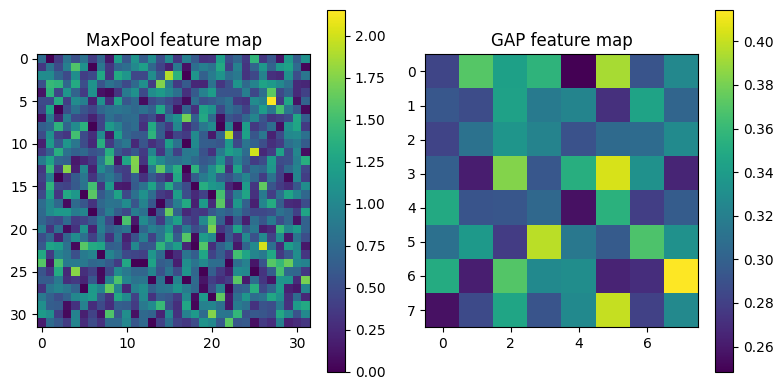

In [5]:
channel_id = 0

max_feat = out_max[0, channel_id].cpu()
gap_feat = out_gap[0, channel_id].cpu()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("MaxPool feature map")
plt.imshow(max_feat, cmap="viridis")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("GAP feature map")
plt.imshow(gap_feat, cmap="viridis")
plt.colorbar()

plt.tight_layout()
plt.show()

### Сравним средние значения и дисперсии активаций

In [7]:
mean_max = out_max.mean().item()
mean_gap = out_gap.mean().item()

print(f"Mean activation after MaxPool: {mean_max:.4f}")
print(f"Mean activation after GAP:     {mean_gap:.4f}")

var_max = out_max.var().item()
var_gap = out_gap.var().item()
print(f"Variance after MaxPool: {var_max:.4f}")
print(f"Variance after GAP:     {var_gap:.4f}")

Mean activation after MaxPool: 0.5658
Mean activation after GAP:     0.2171
Variance after MaxPool: 0.1567
Variance after GAP:     0.0056


## Выводы:

1. MaxPool сохраняет наиболее сильные локальные активации.
2. GAP усредняет признаки и сглаживает пространственную информацию. И среднее и дисперсия уменьшились